<a href="https://colab.research.google.com/github/benchov/AlgoTrading/blob/master/Hidden_Markov_Models_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Imports

In [2]:
!pip install pyhhmm
!pip install --upgrade pandas
!pip install --upgrade pandas-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for pyhhmm: filename=pyhhmm-2.0.1-py3-none-any.whl size=35505 sha256=96e506a2eadf938a6cdec586700a1f33053e6a2f9bd5fd208fe1aa584af5e839
  Stored in directory: /root/.cache/pip/wheels/f5/06/8b/f56001a4de0010706182f4db98d045779a517011d47476708e
Successfully built pyhhmm
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 109 kB 6.6 MB/s 
  Attempting uninstall: pandas-datareader
    Found existing installation: pandas-datareader 0.9.0
    Uninstalling pandas-datareader-0.9.0:
      Successfully uninstalled pandas-datareader-0.9.0


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pyhhmm.gaussian import GaussianHMM
from pandas_datareader import DataReader

In [4]:
# Data extraction
start_date = '2017-01-01'
end_date = '2022-06-01'
symbol = 'SPY'
data = DataReader(name=symbol, data_source='yahoo', start=start_date, end=end_date)
data = data[['Open', 'High', 'Low', 'Adj Close', 'Volume']]

In [5]:
# Add returns and range
df = data.copy()
df['Returns'] = (df['Adj Close'] / df['Adj Close'].shift(1)) -1
df['Range'] = (df['High'] / df['Low']) -1
df.dropna(inplace=True)
df.head()

,Open,High,Low,Adj Close,Volume,Returns,Range
Date,,,,,,,
2017-01-04,225.619995,226.750000,225.610001,205.000458,78744400.0,0.005949,0.005053
2017-01-05,226.270004,226.580002,225.479996,204.837570,78379000.0,-0.000795,0.004879
2017-01-06,226.529999,227.750000,225.899994,205.570389,71559900.0,0.003578,0.008189
2017-01-09,226.910004,227.070007,226.419998,204.891891,46939700.0,-0.003301,0.002871
2017-01-10,226.479996,227.449997,226.009995,204.891891,63771900.0,0.000000,0.006371


In [6]:
# Structure Data
X_train = df[['Returns', 'Range']]
X_train.head()

,Returns,Range
Date,,
2017-01-04,0.005949,0.005053
2017-01-05,-0.000795,0.004879
2017-01-06,0.003578,0.008189
2017-01-09,-0.003301,0.002871
2017-01-10,0.000000,0.006371


### HMM Learning

In [7]:
model = GaussianHMM(n_states=4, n_emissions=2, covariance_type='full')
model.train([np.array(X_train.values)])

(<pyhhmm.gaussian.GaussianHMM at 0x7f6315277550>, 9743.544047700301)

In [8]:
# check hidden states
hidden_states = model.predict([X_train.values])[0]
print(hidden_states[:140])

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [9]:
# regime state means of each feature
model.means

array([[-0.00196935,  0.01381613],
       [ 0.00264689,  0.00674835],
       [ 0.03135548,  0.04270665],
       [-0.0082723 ,  0.02809359]])

In [10]:
model.covars

array([[[ 1.35832841e-04,  2.94655837e-05],
        [ 2.94655837e-05,  5.89142100e-05]],

       [[ 3.56377252e-05,  1.82898661e-05],
        [ 1.82898661e-05,  2.11738985e-05]],

       [[ 1.43760340e-03,  1.00348298e-03],
        [ 1.00348298e-03,  1.05018286e-03]],

       [[ 5.88310532e-04, -9.89017647e-05],
        [-9.89017647e-05,  2.28814174e-04]]])

In [11]:
# Structure the prices for plotting
i = 0
labels_0 = []
labels_1 = []
labels_2 = []
labels_3 = []
prices = df["Adj Close"].values.astype(float)
print("Correct number of rows: ", len(prices) == len(hidden_states))
for s in hidden_states:
    if s == 0:
        labels_0.append(prices[i])
        labels_1.append(float('nan'))
        labels_2.append(float('nan'))
        labels_3.append(float('nan'))
    if s == 1:
        labels_0.append(float('nan'))
        labels_1.append(prices[i])
        labels_2.append(float('nan'))
        labels_3.append(float('nan'))
    if s == 2:
        labels_0.append(float('nan'))
        labels_1.append(float('nan'))
        labels_2.append(prices[i])
        labels_3.append(float('nan'))
    if s == 3:
        labels_0.append(float('nan'))
        labels_1.append(float('nan'))
        labels_2.append(float('nan'))
        labels_3.append(prices[i])
    i += 1

Correct number of rows:  True


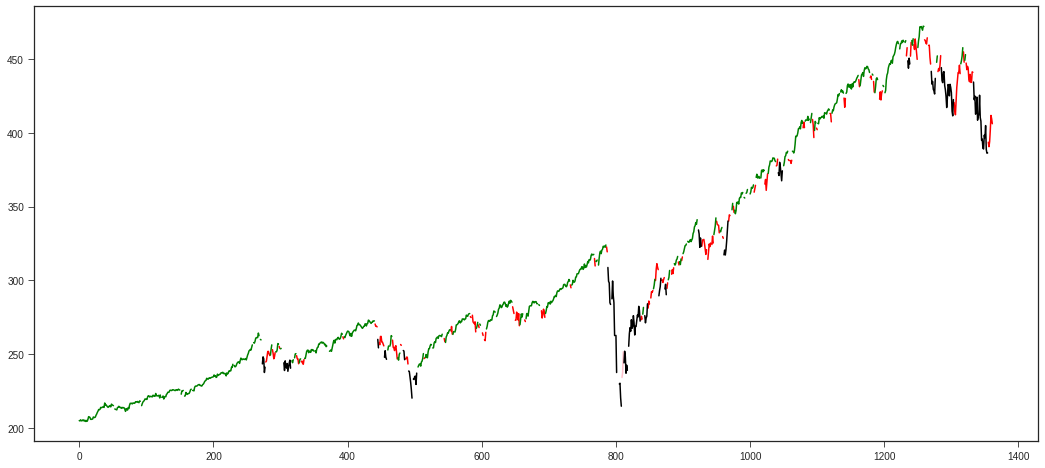

In [13]:
# Plot Chart
fig = plt.figure(figsize= (18, 8))
plt.plot(labels_0, color="red")
plt.plot(labels_1, color="green")
plt.plot(labels_2, color="pink")
plt.plot(labels_3, color="black")
plt.show()